In [1]:
%matplotlib inline 
# plots graphs within the notebook
%config InlineBackend.figure_format='svg' # not sure what this does, may be default images to svg format

from IPython.display import Image

from IPython.core.display import HTML
def header(text):
    raw_html = '<h4>' + str(text) + '</h4>'
    return raw_html

def box(text):
    raw_html = '<div style="border:1px dotted black;padding:2em;">'+str(text)+'</div>'
    return HTML(raw_html)

def nobox(text):
    raw_html = '<p>'+str(text)+'</p>'
    return HTML(raw_html)

def addContent(raw_html):
    global htmlContent
    htmlContent += raw_html
    
class PDF(object):
  def __init__(self, pdf, size=(200,200)):
    self.pdf = pdf
    self.size = size

  def _repr_html_(self):
    return '<iframe src={0} width={1[0]} height={1[1]}></iframe>'.format(self.pdf, self.size)

  def _repr_latex_(self):
    return r'\includegraphics[width=1.0\textwidth]{{{0}}}'.format(self.pdf)

class ListTable(list):
    """ Overridden list class which takes a 2-dimensional list of 
        the form [[1,2,3],[4,5,6]], and renders an HTML Table in 
        IPython Notebook. """
    
    def _repr_html_(self):
        html = ["<table>"]
        for row in self:
            html.append("<tr>")
            
            for col in row:
                html.append("<td>{0}</td>".format(col))
            
            html.append("</tr>")
        html.append("</table>")
        return ''.join(html)
    
font = {'family' : 'serif',
        'color'  : 'black',
        'weight' : 'normal',
        'size'   : 18,
        }



# Guidelines for final exam

<p class='alert alert-success'>
This notebook lists the guidelines for a successful final exam. You will find also an example of velocity profile for a jet and a small python code to provide turbulent inlet conditions for the $k-\omega$ model.
</p>

## Final exam objectives and presentation

The following describes the slides expected during the presentation

### Title slide

<h3> 1. Title slide </h3>

Name of the project and a picture of your CAD

<h3> 2. Objective slide </h3>

Describe the purpose of your simulation, which could be:
<ul>
<li> Computation of drag or lift on an object </li>
<li> Computation of pressure drop in a pipe/duct with obstacle</li>
<li> Comparison of two different designs (defined the metric to be compared) </li>
<li> Investigation of the flow topology for an unusual system</li>
<li> Assessment of OpenFOAM (the simscale flow solver) to predict known flow properties</li>
<li> Investigation of the possible existence of turbulence in a flow outside of the body of knowledge</li>
</ul>
Describe the number of simulations ideally needed to achieve the objectives and the number of simulations performed for this exam

<h3> 3. Flow parameter slide</h3>

Self-explanatory: Velocity and length scales, Re, Ma (if necessary), any non-dimensional number that characterizes the flow, do you think the flow is turbulent or laminar?

<h3> 4. Computational domain slide (may need 2 slides)</h3>

Provide a sketch of screen grab of your bounding box and any region of refinement you defined. Define boundary conditions on the faces of your computational domain

<h3> 5. Mesh refinement </h3>

Show evidence that you did some mesh refinement study. Two level of refinements would be fine, higher level of convergence would be appreciated if the CPU cost is low enough. You need to clearly define and justify the metric (variable) used for assessing the adequacy of the mesh. 

<h3> 6. Significant results </h3>

Show what worked and did not work. Show velocity profiles and contours, same for pressure or anything that you found interesting and characteristic of your flow.

<h3> 7. Future work</h3>
Discuss what needs to be done to make your CFD work and industry-quality project.

## Basic Functions

$$
u(r) = U_c\frac{(r_0-r)+\vert r_0-r\vert}{2\vert r_0-r\vert+\epsilon}+U_\infty\frac{(r-r_1)+\vert r-r_1\vert}{2\vert r-r_1\vert+\epsilon}
$$


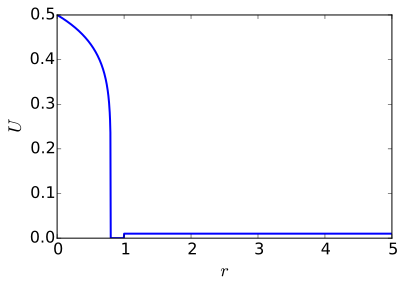

In [2]:
import matplotlib.pyplot as plt
import numpy as np

r = np.linspace(0.,5.,1000)
r0 = 0.8
r1 = 1.0
u = 0.5*(np.power(np.abs(1-r/r0),1./7.))*0.5*((r0-r)+np.abs(r0-r))/(np.abs(r0-r)+1e-6) \
   +0.01*0.5*((r-r1)+np.abs(r-r1))/(np.abs(r-r1)+1e-6)

plt.plot(r,u,lw = 2)
#plt.legend(loc=3, bbox_to_anchor=[0, 1],
#           ncol=3, shadow=True, fancybox=True)
plt.xlabel('$r$', fontdict = font)
plt.ylabel('$U$', fontdict = font)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.show()

# Inlet conditions for $k-\omega$ RANS model in internal flows


Internal flows are defined as cylindrical pipes, ducts and annulus. The flow is characterized by:
<ol>
<li> Velocity scale $U_b$, typically the bulk or average velocity (m/s).</li>
<li> The hydraulic diameter $D$ (m).</li>
<li> The fluid kinematic viscosity $\nu$ (m^2/s), or kinematic viscosity $\mu$ (kg/(m.s) and density $\rho$ (kg/m^3).</li>
</ol>
These parameters are used in the Reynolds number:
$$
Re=\frac{\rho U_bD}{\mu}=\frac{U_bD}{\nu}
$$
The following calculator provides estimates of the turbulent kinetic energy $k$ and $\omega$ based on the parameters above and the turbulent intensity
$$
I = \frac{u'}{U_b},
$$
where $u'$ is the typical standard deviation of the velocity fluctuations experienced by the flow. For ducts, the following correlation may be used:
$$
I=0.16Re^{-1/8}
$$
but you may use a larger value if your inlet is located immediately downstream of geometry creating intense turbulence. From the knowledge of $I$, $k$ and $\omega$ can be computed as:
$$
k=\frac{3}{2}(IU_b)^2
$$
$$
\omega = \frac{\sqrt{k}}{C_\mu^{1/4}{\cal l}}
$$
where $C_\mu\approx 0.09$ and ${\cal l}$ is the turbulent length scale, for ducts:
$$
{\cal l}=0.07D
$$

In [17]:

geo = raw_input('Boundary layer (b), channel (c), pipe (p), duct (d), or annulus (a)?')
if geo == 'b':
    D = float(raw_input('boundary layer thickness (m):'))
elif geo == 'c':
    D = float(raw_input('Channel height (m):'))
elif geo == 'p':
    D = float(raw_input('Diameter (m):'))
elif geo == 'd':
    a = float(raw_input('first dimension (m):'))
    b = float(raw_input('second dimension (m):'))
    D = 4.*a*b/(2.*(a+b))
elif geo == 'a':
    Di = float(raw_input('Inner diameter (m):'))
    Do = float(raw_input('Outer diameter (m):'))
    D = Do - Di
else:
    print('your geometry is unknown')
u_cal = raw_input('for velocity scale: mass flow (m) or bulk velocity (u)?')
if u_cal == 'u':
    U_b = float(raw_input('Velocity scale (m/s):'))
elif u_cal == 'm':
    m = float(raw_input('mass flow rate (kg/s):'))
    rho = float(raw_input('fluid density (kg/m^3):'))
    if geo == 'p':
        area = np.pi*(D**2)/4.
    elif geo == 'd':
        area = a*b
    elif geo == 'a':
        area = np.pi/4.*(Do**2-Di**2)
    U_b = m/(rho*area)
    print('bulk velocity: %10.3e m/s' %U_b)
nu = float(raw_input('Kinematic viscosity (m^2/s):'))
Re = U_b*D/nu
print("Reynolds number: %10.3e" %Re)
I_rec = 0.16*Re**(-1./8.)
print("Recommended turbulent intensity for pipe/duct: %10.3e" %I_rec)
I = float(raw_input('Turbulent intensity:'))
if 'geo' == 'b':
    l = 0.04 * D
else:
    l = 0.07 * D
TKE = 3./2.*(I*U_b)**2
print("TKE = %10.3e m^2/s^2" %TKE)
omega = TKE**0.5/(0.09)**0.25/l
print("omega = %10.3e 1/s" %omega)
    

Boundary layer (b), channel (c), pipe (p), duct (d), or annulus (a)?p
Diameter (m):0.0635
for velocity scale: mass flow (m) or bulk velocity (u)?75
Kinematic viscosity (m^2/s):1.5e-5
Reynolds number:  2.156e+04
Recommended turbulent intensity for pipe/duct:  4.596e-02
Turbulent intensity:0.04596
TKE =  8.218e-02 m^2/s^2
omega =  1.178e+02 1/s


46666.6666667


In [14]:
def cube(a):
    return a**3
def by_three(number):
    return (number % 3) == 0 

In [11]:
number =4
print (number % 3) == 0

False
